# A Very, Very Brief Introduction to Data Visualization (Part II)

This document, together with [part1](part1.ipynb) constitute a short two-part course covering the basics of data visualization.

# About Me
<br>
<div style="font-size: larger;">
Chandrasekhar (Sekhar) Ramakrishnan<br>
<a href="https://twitter.com/ciyer">@ciyer</a><br>
<br>
<a href="https://datascience.ch">Swiss Data Science Center</a> and freelance data scientist; teach data viz at <a href="https://propulsion.academy">Propulsion Academy</a>

<a href="https://illposed.com"><img alt="illposed logo" src="images/illposed-logo.svg" width="300px"/></a>
</div>

# **Part 1** Thinking about visualizations

See [part1](part1.ipynb)

In the first part, we developed a framework for thinking about visualizations and looked at some ideas and tools that can help us build on a solid foundation.

# **Part 2** Storytelling with data

* The importance of **context**
* Show multiple variables using **layering**
* Use **highlighting** to draw attention to particular items
* **Faceting** lets you show more data

Part 2 continues on this foundation to look at how to make visualizations for reasoning about data.

# The Importance of **Context**

## References

<div style="display: flex; flex-direction: row;  justify-content: space-around">

<div>

<h2>Edward Tufte</h2>
<ul>
<li><a href="https://www.amazon.com/Visual-Display-Quantitative-Information/dp/0961392142/">Visual Display of Quantitative Information</a> (1983)</li>
<li><a href="https://www.amazon.com/Envisioning-Information-Edward-R-Tufte/dp/0961392118/">Envisioning Information</a> (1990)</li>
</ul>

</div>
</div>

The materials draw extensively from Edward Tufte’s first two books. If you are not already familiar with them, I highly recommend those books for going deeper into these topics.

## Edward Tufte *Envisioning Information*

At the heart of quantitative reasoning is a single question:

**Compared to what?**

## Enabling Comparison

How can we support making comparisons?

<div style="font-size: larger; margin: 20px;">
    To make comparisons possible, give <b>context</b> by <b>layering information</b> and increasing <b>data density</b>. Highlight to <b>draw attention</b> to important features.
</div>

Quantitative reasoning is about *comparison*, and to make comparisons, you need to see *data in context*. This is done through layering of information, and increasing the density of data. There is some tension between density and clarity, though. As we have more data, it is easier to lose the forest for the trees. Highlighting is a way to present high density data and still give signposts to guide the viewer to relevant information. We will look at how to use color, transparency, and text to achieve this.

# **Providing Context** using color and text

## **Color** to layer information

![FRED](https://fred.stlouisfed.org/graph/fredgraph.png?g=EaVv) https://fred.stlouisfed.org/series/PCE#0

Plots of economic data from [FRED](https://fred.stlouisfed.org) always shade in periods of recession since many economic variables behave differently when economy is contracting. This is a plot of *personal consumption expenditures*. An economy in recession is one obvious reason why people may be spending less (in aggregate).

On the face of it, this looks like a plot of two variables, YoY change in PCE (y-axis) and time (x-axis). But there is in fact another variable of data necessary to make this chart —  YoY change in (nominal) GDP — we just do not see it in full fidelity, and it is not necessary. We only care if this variable is below zero or not, in which case, we mark the region in gray (a recession that has finished) or yellow (a recession that is ongoing).

## **Text** to layer information

![Three-point Scatter](https://fivethirtyeight.com/wp-content/uploads/2015/12/morris-stephcurry-1.png?w=600)
http://fivethirtyeight.com/features/stephen-curry-is-the-revolution/

Using text is another way of layering information. This plot is taken from an article about basketball and illustrates how the teams in the semifinals of the 2014 &ndash; 2015 season playoffs all took advantage of the 3-point shot. This is a plot of three variables: two quantitative ones and a nominal variable &mdash; team name, but the nominal variable is not shown for all the teams, just a selection of them necessary for contextualizing the information.

## **Clarity in density** with color and text

![Curry Scatter](https://fivethirtyeight.com/wp-content/uploads/2015/12/morris-stephcurry-21.png?w=600)
http://fivethirtyeight.com/features/stephen-curry-is-the-revolution/

Here is another plot from the same article about the basketball player Stephen Curry. To explain his skill, this plot shows how he compares to the league in general and the best players of the league in particular. It does this by 1. achieving high data density 2. layering multiple variables 3. highlighting and drawing your attention to the relevant data.
To achieve the high density, **transparency** is used to also many dots to overlap, but still be distinct. **Text labels** and **color** are used to highlight a small number of players to examine in detail. We do not need the names of every single player, but knowing a few players helps us see how Curry compares to other superstars.

## **Model** to aid interpretation

![Messi Scatter](https://fivethirtyeight.com/wp-content/uploads/2014/06/morris-feature-messi-2.png?w=600) https://fivethirtyeight.com/features/lionel-messi-is-impossible/

The data that is layered over a basic plot can come from the same data source, a secondary data source, or be synthetic — computed using the data. 

Here is an example of layering used to show data with a model of it. In this case, we see a regression of shooting efficiency vs. shooting volume of a large number of football players, making it possible to compare two extraordinary players: Messi and Ronaldo. 

# **Providing Context** Data Density

Viewing as much data as possible is key to proper interpretation and robust understanding. Cherry-picking a subset of the data is a recipe for misleading (intentionally or unintentionally).

## **Phillips Curve** (after Tufte)

Following an example presented by Tufte in *The Visual Display of Quantitative Information* and revisited on his [website](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=00041w), consider the Phillips Curve, a concept from economics which states that there is an inverse relationship between the unemployment rate and the inflation rate: as the unemployment rate declines, the inflation rate should increase.

If we look at data from 1961 to 1969, this seems plausible.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import introviz

introviz.set_style()

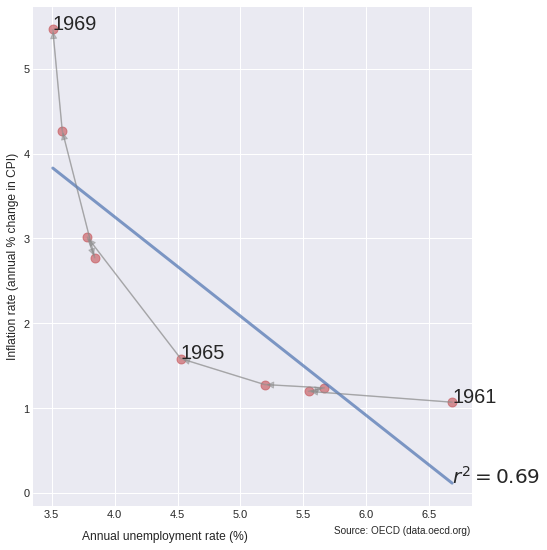

In [2]:
phillips_df = introviz.phillips.read_data("data/phillips-ue-cpi.csv")
fig, ax = plt.subplots(figsize=(8, 8))
introviz.phillips.xy_plot(ax, phillips_df.loc[(slice(None), slice("1961", "1969")), :], "USA")
ax.set_xlabel("Annual unemployment rate (%)")
ax.set_ylabel("Inflation rate (annual % change in CPI)")
ax.xaxis.set_label_coords(0.3, -0.05)
introviz.phillips.cite_source(ax, "OECD (data.oecd.org)")
fig.tight_layout()

As a consumer of visualizations, you should be skeptical when you see small amounts of data displayed: it is easy to cherry-pick data to support an argument, hiding data that does not. As a creator of visualizations, you should aim to show as much data as possible. Not only is it honest, it is also more convincing. If the conclusion holds when looking at much data, it is more robust.

If we expand our view to 60 years of data covering the period 1960 to 2020, we see a more complex picture emerge revealing periods in the US high inflation and high unemployment (1970s/early 1980s) and periods of decreasing unemployment and low inflation (2014&ndash;2019).

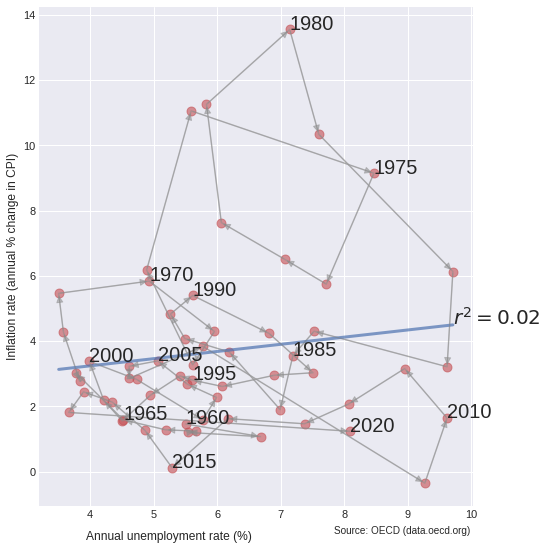

In [3]:
phillips_df = introviz.phillips.read_data("data/phillips-ue-cpi.csv")
fig, ax = plt.subplots(figsize=(8, 8))
introviz.phillips.xy_plot(ax, phillips_df, "USA")
ax.set_xlabel("Annual unemployment rate (%)")
ax.set_ylabel("Inflation rate (annual % change in CPI)")
ax.xaxis.set_label_coords(0.3, -0.05)
introviz.phillips.cite_source(ax, "OECD (data.oecd.org)")
fig.tight_layout()

## **Phillips Curve** multiple countries

William Phillips identified the Phillips curve while studying unemployment and inflation in the United Kingdom. Maybe the US and UK behave differently in this regard. How can we look at a larger array of countries?

One way would be to overlay multiple plots in one figure. As you can see, that does not work very well when data density becomes high. It is very difficult to distinguish the two series from one another.

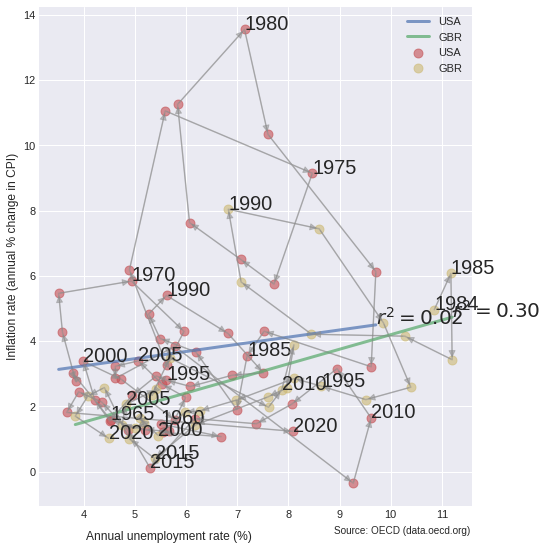

In [4]:
palette = sns.color_palette()
fig, ax = plt.subplots(figsize=(8, 8))
introviz.phillips.xy_plot(ax, phillips_df, "USA")
introviz.phillips.xy_plot(ax, phillips_df, "GBR", s_color=palette[2], r_color=palette[3])
ax.set_xlabel("Annual unemployment rate (%)")
ax.set_ylabel("Inflation rate (annual % change in CPI)")
ax.legend()
ax.xaxis.set_label_coords(0.3, -0.05)
introviz.phillips.cite_source(ax, "OECD (data.oecd.org)")
fig.tight_layout()

# **Faceting**

## **Edward Tufte** *Envisioning Information* (1990)

<div style="font-size: larger; margin: 20px;">
    At the heart of quantitative reasoning is a single question:
    <p>
    <b>Compared to what?</b>
    </p>
    <p>Small multiple designs, multivariate and data bountiful, answer directly by visually enforcing comparisons of changes, of the differences among objects, of the scope of alternatives. For a wide range of problems in data presentation, small multiples are the best design solution.</p>
</div>

Tufte (Envisioning Information, p. 67)

To compare the relationship between unemployment and inflation in the USA and UK, we can do a small-multiples plot. Each plot is a complex scatterplot, showing the movement of the series through time, layering a model and orienting text, yet they remain readable (and could be improved with a little intervention in Adobe Illustrator).

Notice how the x and y-axes cover the same range. This is important to make the plots comparable and should only be violated with good reason.

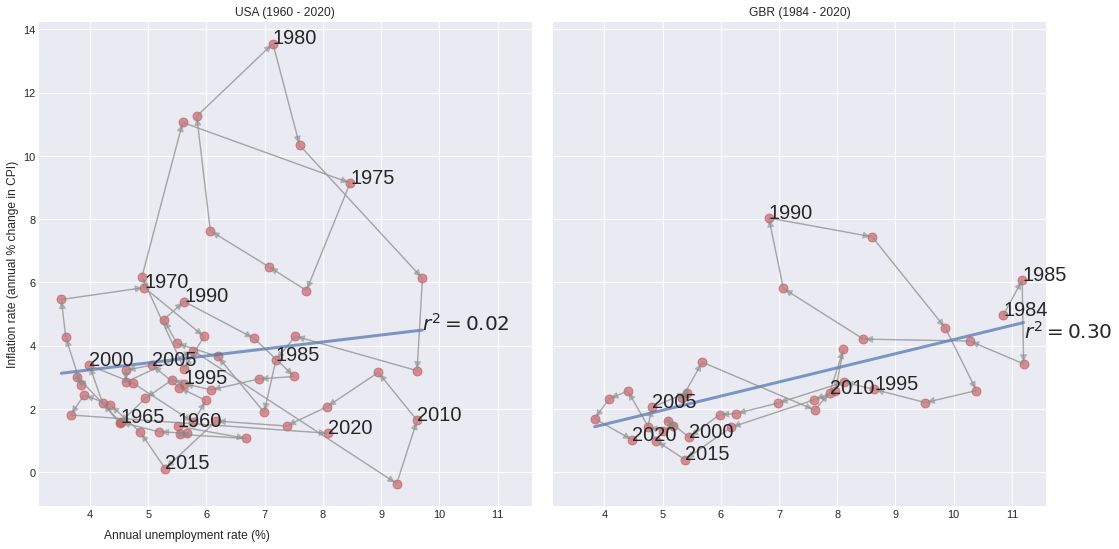

In [5]:
palette = sns.color_palette()
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 8))
introviz.phillips.xy_plot(axs[0], phillips_df, "USA")
introviz.phillips.xy_plot(axs[1], phillips_df, "GBR", text_offset=(0, -0.5))
axs[0].set_xlabel("Annual unemployment rate (%)")
axs[0].set_ylabel("Inflation rate (annual % change in CPI)")
axs[0].xaxis.set_label_coords(0.3, -0.05)
axs[0].set_title("USA (1960 - 2020)")
axs[1].set_title("GBR (1984 - 2020)")
introviz.phillips.cite_source(ax, "OECD (data.oecd.org)")
fig.tight_layout()

## **Phillips Curve** nine countries

The faceted plot approach can be extended to a large number multiples as well. Here we see the Phillips Curve plotted for nine countries, giving a richer and more nuanced view of the relationship between unemployment and inflation. The relationship broadly holds for two or three countries (Sweden, Japan, and, if we want to be generous, Italy), but is not a good description of what we see in the other six. And in the UK, the slope is opposite to what is expected.

Notice that the facets are sorted by $r^2$. Some kind of sorting of facets is usually necessary to make for a visually calmer and more easily readable presentation.

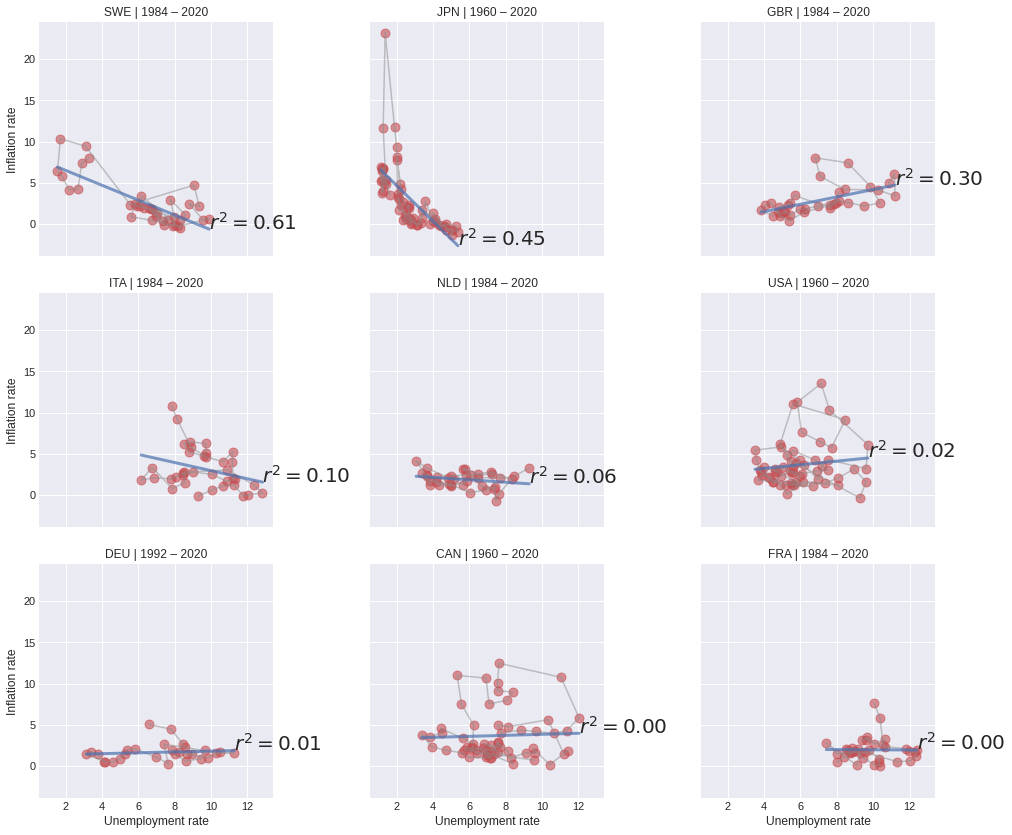

In [6]:
tdf = phillips_df.loc[(["CAN", "USA", "JPN", "GBR", "FRA", "DEU", "NLD", "SWE", "ITA"]), :]
ue_cpi_r2_df = introviz.phillips.r2_df(tdf).sort_values("R2", ascending=False)
g = sns.FacetGrid(tdf.reset_index(), col="LOCATION", col_wrap=3, col_order=ue_cpi_r2_df['LOCATION'], height=4, aspect=1.2)
g.map_dataframe(introviz.phillips.facet_xy_plot, "UE", "c_cpi")
g.set_xlabels("Unemployment rate")
g.set_ylabels("Inflation rate")

for l in ue_cpi_r2_df['LOCATION'].values:
    ax = g.axes_dict[l]
    ax.set_title(introviz.phillips.facet_xy_plot_label(tdf, ue_cpi_r2_df, l))

# **Case Study** Mortality in France 2000 — 2021

[Baptiste Coulmont](https://coulmont.com), a sociologist in Paris, produced some stunning visualizations of all-cause mortality in France over the period of 2000 — 2021. The first one appeared on his [blog](https://coulmont.com/blog/2020/04/24/2020-une-mortalite-specifique/), and he posts updated versions on his [twitter feed](https://twitter.com/coulmont/status/1377966826517372928).

As a case study for applying these contextualization techniques, we will recreate his plot and explore the design space in the process.

## **Question**

Data visualizations should always be motivated by questions, since the question will guide design choices. Our question here is: **Are the effects of COVID in France visible in all-cause mortality data?**

### Data Sources

We are going to start with a table of daily mortality for France from [Insee](https://www.insee.fr/fr/accueil), and we will add in information from Wikipedia, and Johns Hopkins University CSSE, but the data are already in the repository in the [data](data/README.md) folder, so there is no need to download it.

## **Goals**

As we create our visualizations, we will keep the following goals in mind:

* Let the data tell its story (provide necessary **context** and explanations)
* Enable **quantitative reasoning** with our eyes
* Make **comparisons** possible

## **Basic Plot**

Here is a basic plot of the all-cause mortality data. This visualization does not tell a story yet, but it is our starting point. We already had a question to start with; what additional questions arise by looking at this plot?

In [7]:
covid_df = introviz.covidfr.read_data()

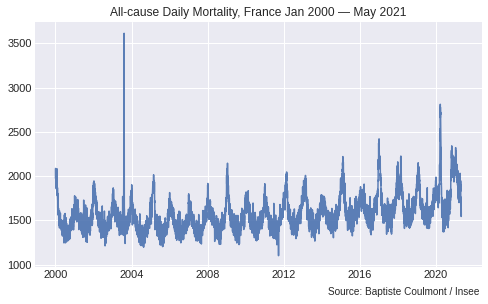

In [8]:
fig, ax = plt.subplots(figsize=(8, 4.5))
ax.plot(covid_df.index, covid_df['allcause'], alpha=0.9)
introviz.covidfr.cite_source(ax)
ax.set_title("All-cause Daily Mortality, France Jan 2000 — May 2021");

## **Questions Revised**

Some questions immediately jump out. 

1. The first is that there is a clear upward trend that starts around 2012 already. 

Why is that? The next question is 

2. Where should I start looking for the effects of the pandemic? 

The spike in early 2020 is probably during the pandemic, but where exactly should I start looking. 

And 

3. The most striking feature in this plot is not in 2020 or 2021, but just before 2004! 

What is going on there!?

In [9]:
# Population increase between 2000 and 2020 in %
demo_df = introviz.covidfr.read_demo_data()
increase = ((demo_df['population'].iloc[-2] - demo_df['population'].iloc[0]) / demo_df['population'].iloc[0]) * 100
print(f"{increase:.2f}% increase in population between 2000 and 2020")

10.29% increase in population between 2000 and 2020


## **Demographics of France**

The population of metropolitan France was *59,049,000* in 2000, compared to *65,124,000* in 2020 — an increase of more than **10%**.

Assuming the base mortality rate stayed constant, we would expect 10% more deaths in 2020 even without a pandemic. One of our goals is to ensure that comparisons are possible and valid, so we need to adjust for this increase, otherwise, some of the effect we see will have nothing to do with the pandemic.

Source: https://en.wikipedia.org/wiki/Demographics_of_France#Vital_statistics_from_1900[25]

## **Basic Plot with Context**

Here, we plot the same series, but we convert into mortality per 100k of population to adjust for the effects of the increase in population. (There may still be some demographic effects like an older population in aggregate in 2021 vs. 2000).

That 2003 spike? It occurred in a year with a very bad summer heatwave, which is interesting to know. We indicate the time frame of the pandemic with a different color mark (red). I have defined the pandemic as starting with the 10th COVID-19 death in France.

In [10]:
pandemic_start = covid_df[covid_df['covid'].cumsum() > 10].iloc[0].name

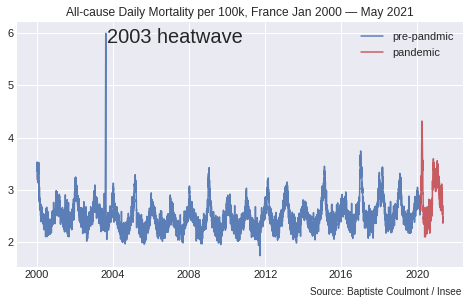

In [11]:
fig, ax = plt.subplots(figsize=(8, 4.5))
pre_pandemic_ser = covid_df.loc["2000":pandemic_start, 'allcause_per100k']
pandemic_ser = covid_df.loc[pandemic_start:, 'allcause_per100k']
ax.plot(pre_pandemic_ser.index, pre_pandemic_ser, alpha=0.9, label="pre-pandmic")
ax.plot(pandemic_ser.index, pandemic_ser, alpha=0.9, label="pandemic")
introviz.covidfr.cite_source(ax)
ax.set_title("All-cause Daily Mortality per 100k, France Jan 2000 — May 2021")
ax.annotate("2003 heatwave", (pd.to_datetime("2003-09-01"), 5.8))
ax.legend();

## **New Directions**

Looking at this revised plot gives us an indications of further necessary improvements. It looks like COVID effects are visible here, but the seasonality in the time series makes them difficult to precisely identify. It does not make much sense to compare January and June because mortality is typically lower in the warmer months, but it is not easy to ensure we are comparing January to January and June to June with this data presentation.

Let us make a new plot that makes it easier to compare similar points in the year over different years.

## **Year Plot**

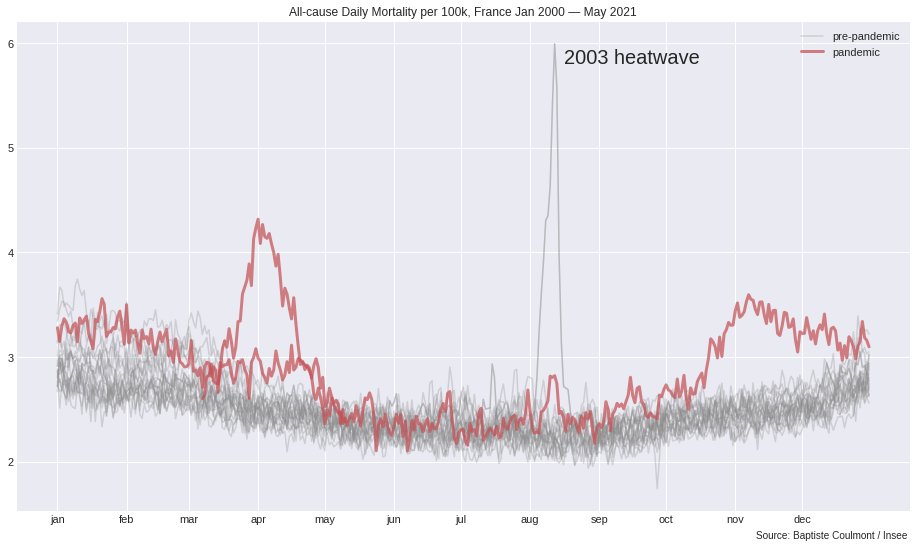

In [12]:
fig, ax = plt.subplots(figsize=(16, 9))
introviz.covidfr.plot_yearly_all_cause_mortality(ax, covid_df, pandemic_start)
ax.legend();

A plot where the x-axis covers 12 months (rather than 20 years) makes it natural to compare the same time over multiple year. The outlines of a story are now starting to come through. We see a clear evidence of a 1st and 2nd wave of the pandemic in the data. It looks like there is also a mini wave in the summer of 2020. But to be more certain of this, we need to incorporate some additional data: COVID-specific mortality as well as all-cause mortality.

## **All-cause and COVID**

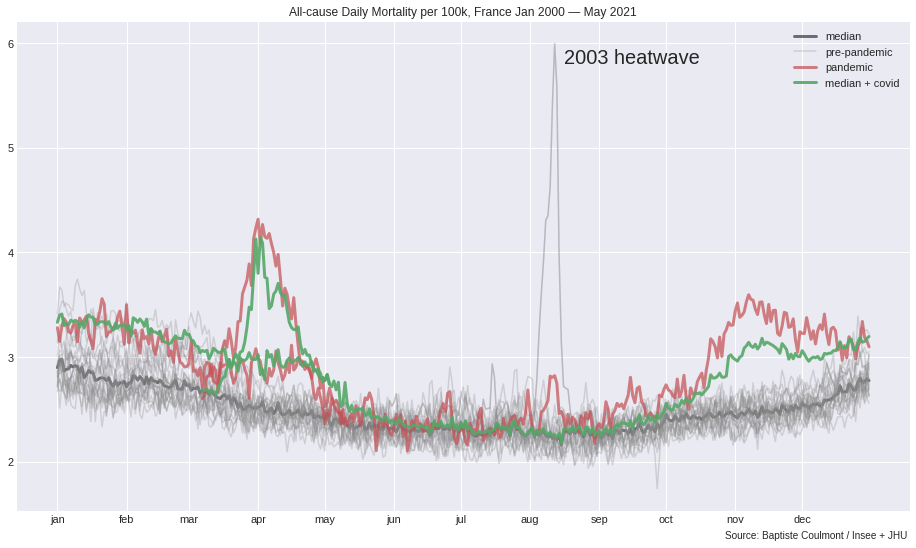

In [13]:
fig, ax = plt.subplots(figsize=(16, 9))
introviz.covidfr.plot_median_mortality(ax, covid_df)
introviz.covidfr.plot_yearly_all_cause_mortality(ax, covid_df, pandemic_start, "Baptiste Coulmont / Insee + JHU")
introviz.covidfr.plot_covid_mortality(ax, covid_df, pandemic_start)
ax.legend();

Let us add another series into the mix to better understand what is happening in those three time frames (1st wave, mini-wave, 2nd wave). Johns Hopkins University publishes a data set of COVID-19 mortality that we can use to provide more context. If we look closely, we see that most of the deaths in spring 2020 have COVID as their source. We also see that the summer 2020 increase in mortality is not attributable to COVID and the same for many of the fall 2020 deaths as well. 

But this plot is becoming visually busy and difficult to follow. Now is a good time to turn to small-multiples to help us out.

## **All-cause and COVID, small multiples**

Let us use the small-multiples technique and add some text to explain and quantify various things we see in the data.

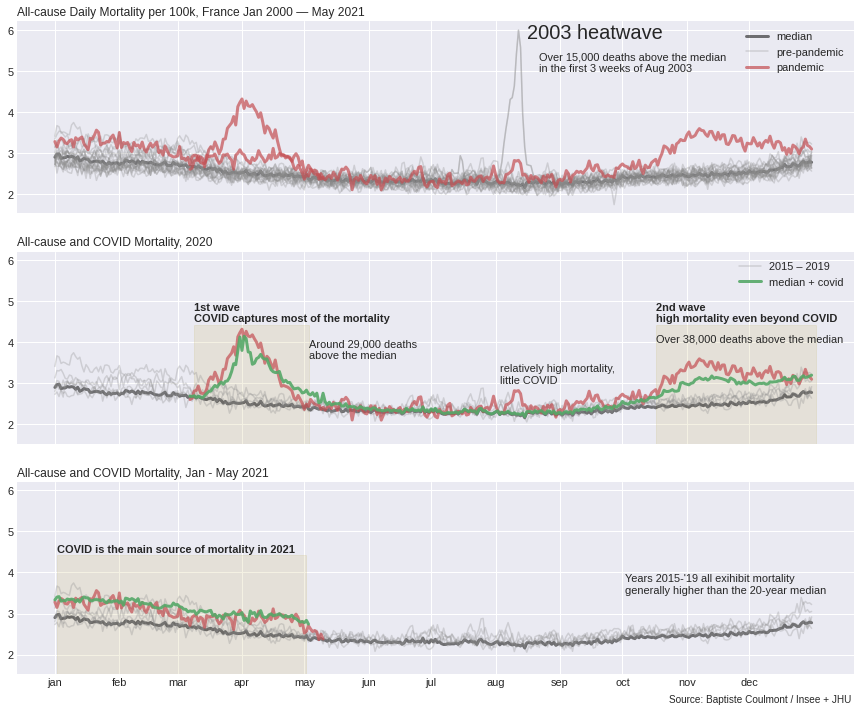

In [14]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15, 12))
palette = sns.color_palette()
excess_mortality = introviz.covidfr.excess_mortality
ax = axs[0]
introviz.covidfr.plot_median_mortality(ax, covid_df)
introviz.covidfr.plot_prepandemic_all_cause_mortality(ax, covid_df, pandemic_start)
introviz.covidfr.plot_pandemic_all_cause_mortality(ax, covid_df, pandemic_start)
heatwave_start = pd.to_datetime('2003-08-01')
heatwave_end = pd.to_datetime('2003-08-21')
ax.annotate(f"Over {excess_mortality(covid_df, demo_df, heatwave_start, heatwave_end):,.0f} deaths above the median\nin the first 3 weeks of Aug 2003",
    (heatwave_end.day_of_year, 5.0),
    fontsize=11)
ax.set_title("All-cause Daily Mortality per 100k, France Jan 2000 — May 2021", loc='left')
ax.legend()

ax = axs[1]
introviz.covidfr.plot_median_mortality(ax, covid_df, label=None)
introviz.covidfr.plot_prepandemic_all_cause_mortality(ax, covid_df.loc["2015":"2020", :], pandemic_start, alpha=0.4, label="2015 – 2019")
introviz.covidfr.plot_pandemic_all_cause_mortality(ax, covid_df, pandemic_start, years=[2020], label=None)
introviz.covidfr.plot_covid_mortality(ax, covid_df, pandemic_start, years=[2020])
wave1_end = pd.to_datetime("2020-05-01")
ax.axvspan(pandemic_start.day_of_year, wave1_end.day_of_year, ymax=0.62, alpha=0.2, color=palette[2])
ax.annotate("1st wave\nCOVID captures most of the mortality",
    (pandemic_start.day_of_year, 4.5),
    fontsize=11,
    fontweight="bold")
ax.annotate(f"Around {excess_mortality(covid_df, demo_df, pandemic_start, wave1_end):,.0f} deaths\nabove the median",
    (wave1_end.day_of_year, 3.6),
    fontsize=11)
ax.annotate("relatively high mortality,\nlittle COVID",
    (pd.to_datetime("2020-08-01").day_of_year, 3.0),
    fontsize=11)
wave2_2020 = pd.to_datetime("2020-10-15")
end_2020 = pd.to_datetime("2020-12-31")
ax.axvspan(wave2_2020.day_of_year, end_2020.day_of_year, ymax=0.62, alpha=0.2, color=palette[2])
ax.annotate("2nd wave\nhigh mortality even beyond COVID",
    (wave2_2020.day_of_year, 4.5),
    fontsize=11,
    fontweight="bold")
ax.annotate(f"Over {excess_mortality(covid_df, demo_df, wave2_2020, end_2020):,.0f} deaths above the median",
    (wave2_2020.day_of_year, 4.0),
    fontsize=11)
ax.set_title("All-cause and COVID Mortality, 2020", loc='left')
ax.legend()

ax = axs[2]
introviz.covidfr.plot_median_mortality(ax, covid_df, label=None)
introviz.covidfr.plot_prepandemic_all_cause_mortality(ax, covid_df.loc["2015":"2020", :], pandemic_start, alpha=0.4, label="2015 – 2019")
introviz.covidfr.plot_pandemic_all_cause_mortality(ax, covid_df, pandemic_start, years=[2021])
introviz.covidfr.plot_covid_mortality(ax, covid_df, pandemic_start, years=[2021])
ax.axvspan(pd.to_datetime("2021-01-01").day_of_year, pd.to_datetime("2021-05-01").day_of_year, ymax=0.62,
    alpha=0.2, color=palette[2])
ax.annotate("COVID is the main source of mortality in 2021",
    (pd.to_datetime("2021-01-01").day_of_year, 4.5),
    fontsize=11,
    fontweight="bold")
ax.annotate("Years 2015-'19 all exihibit mortality\ngenerally higher than the 20-year median",
    (pd.to_datetime("2021-10-01").day_of_year, 3.5),
    fontsize=11)
ax.set_title("All-cause and COVID Mortality, Jan - May 2021", loc='left')
introviz.covidfr.cite_source(ax, "Baptiste Coulmont / Insee + JHU")

## The Original

For comparison, here is the original we are copying. Content-wise ours is almost the same, but there are some differences due to different decisions we made.

![Coulmont Surmortalité](https://coulmont.com/vordpress/wp-content/uploads/2020/11/deces-2001-2020-surmortalite-2020-11-13-min.png)

# **Take Aways**

By **showing data, overlaying information, and, incorporating multiple data sources**, it is possible to create a story that gives nuanced insight into the effect of COVID-19 on mortality in France. We can see phenomena against the inherent seasonal and between-year variation in the data. We also get a glimpse of potential comparison to another looming catastrophe, climate change.